In [ ]:
import requests
#from lxml import html

In [ ]:
headers = {'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,'
                '*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
      'accept-language': 'en-GB;q=0.9,en-US;q=0.8,en;q=0.7',
      'dpr': '1',
      'sec-fetch-dest': 'document',
      'sec-fetch-mode': 'navigate',
      'sec-fetch-site': 'none',
      'sec-fetch-user': '?1',
      'upgrade-insecure-requests': '1',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                    'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
x = requests.get('https://www.zillow.com/homes/La-Jolla,-San-Diego,-CA_rb/', headers=headers)

print(x.text)

## Trying selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [ ]:
driver = webdriver.Firefox()
driver.get("http://www.python.org")
assert "Python" in driver.title
elem = driver.find_element(By.NAME, "q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
assert "No results found." not in driver.page_source
driver.close()

In [ ]:
driver = webdriver.Firefox()
driver.get('https://www.zillow.com/homes/La-Jolla,-San-Diego,-CA_rb/')
map = driver.find_element(By.CLASS_NAME, 'BulkPropertyMapMarker')
print(map.text)

In [ ]:
with open("data/test.html", "w", encoding='utf-8') as f:
    f.write(driver.page_source)

In [ ]:
map.tag_name

In [ ]:
map.accessible_name

In [ ]:
driver.close()

In [39]:
import pandas as pd
cities = pd.read_csv('data/Missing_CRMLS_Cities_in_Zillow_or_Precisely.csv')
cities.head()

,City
0,Alamo Oaks
1,Altadena
2,Anaheim
3,Antelope
4,Arleta


In [ ]:
cities['City'] = [x.lower().replace(' ', '-') for x in cities['City']]
cities.head()

In [ ]:
import time

In [ ]:
driver = webdriver.Firefox()
no_map = []
for c in cities['City']:
    driver.get(f'https://www.zillow.com/homes/{c}-ca/')
    with open(f"data/{c}.html", "w", encoding='utf-8') as f:
        f.write(driver.page_source)
    try:
        map = driver.find_element(By.CLASS_NAME, 'BulkPropertyMapMarker')
    except:
        print(c)
        no_map.append(c)
    time.sleep(30)

In [1]:
from lxml import html
from svgpath2mpl import parse_path
import re
import string
import matplotlib
import numpy as np
from matplotlib.path import Path
# svgpath = "M10 10 C 20 20, 40 20, 50 10Z"
def svg_parse(path):
      commands = { 'M' : (Path.MOVETO,),   'L' : (Path.LINETO,),
                   'Q' : (Path.CURVE3,)*2, 'C' : (Path.CURVE4,)*3,
                   'Z' : (Path.CLOSEPOLY,) }
      path_re = re.compile(r'([MLHVCSQTAZ])([^MLHVCSQTAZ]+)', re.IGNORECASE)
      float_re = re.compile(r'(?:[\s,]*)([+-]?\d+(?:\.\d+)?)')
      vertices = []
      codes = []
      last = (0,0)
      for cmd, values in path_re.findall(path):
          points = [float(v) for v in float_re.findall(values)]
          points = np.array(points).reshape((len(points)//2,2))
          if cmd in string.lower():
              points += last
          cmd = string.upper(cmd)
          last = points[-1]
          codes.extend( commands[cmd] )
          vertices.extend( points.tolist() )
      return codes, vertices

In [2]:
from io import StringIO, BytesIO
with open('data/Adelanto.htm', 'r') as f:
    zillow = f.read()

In [3]:
zillow

'<!DOCTYPE html>\n<!-- saved from url=(0603)https://www.zillow.com/adelanto-ca/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22north%22%3A35.043809496970454%2C%22south%22%3A34.39023504132246%2C%22east%22%3A-117.15873792578125%2C%22west%22%3A-117.90031507421875%7D%2C%22usersSearchTerm%22%3A%22Adelanto%2C%20CA%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A16684%2C%22regionType%22%3A6%7D%5D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22doz%22%3A%7B%22value%22%3A%226m%22%7D%7D%2C%22isListVisible%22%3Atrue%7D -->\n<html lang="en"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><style>.LGLeeN-keyboard-shortcuts-view{display:-webkit-box;display:-webkit-flex;display:-moz-box;display:-ms-flexbox;display:flex}.LGLeeN-keyboard-shortcuts-view table,.LGLeeN-keyboard-shortcuts-view tbody,.LGLeeN-keyboard-shortcuts-view td,.LGLeeN-keyboard-

In [4]:
doc = html.fromstring(zillow)

In [5]:
svgs = doc.find_class(class_name='boundary-svg')
polyregion = doc.find_class(class_name='poly-region')

In [6]:
svgs[0].keys()

['class', 'data-row', 'data-column']

In [7]:
svgs[0].get('data-row')

'405'

In [8]:
polyregion[0].keys()

['class', 'd', 'stroke-width', 'fill']

In [9]:
polyregion[0].get('d')

' M 212 272 L 211 269 L 213 268 L 213 267 L 216 270 L 217 272 L 212 272 M 103 218 L 107 218 L 109 219 L 111 219 L 114 221 L 116 222 L 118 222 L 121 225 L 123 226 L 126 230 L 128 232 L 131 236 L 135 236 L 135 246 L 139 246 L 157 245 L 158 251 L 158 256 L 159 259 L 159 264 L 162 268 L 163 268 L 166 267 L 168 267 L 173 267 L 173 272 L 103 272 L 103 268 L 103 263 L 103 218'

In [10]:
mpl_path = parse_path(polyregion[0].get('d'))
coords = mpl_path.to_polygons()
from shapely.geometry import Polygon, LineString
a = Polygon(coords[0])

In [11]:
mpl_path = parse_path(polyregion[1].get('d'))
coords = mpl_path.to_polygons()
from shapely.geometry import Polygon, LineString
b = Polygon(coords[0])

In [25]:
import shapely
from tqdm.auto import tqdm
import geopandas as gpd
polyregion = doc.find_class(class_name='poly-region')
region = []
for p in tqdm(polyregion):
    mpl_path = parse_path(p.get('d'))
    coords = mpl_path.to_polygons()
    region.append(LineString(coords[0]))
name=['Adelanto']*len(polyregion)
gdf = gpd.GeoDataFrame({'region': name, 'geometry': region})

  0%|          | 0/5 [00:00<?, ?it/s]

In [28]:
gdf.set_crs(epsg='4326')

,region,geometry
0,Adelanto,"LINESTRING (212 272, 211 269, 213 268, 213 267..."
1,Adelanto,"LINESTRING (239 57, 203 57, 204 63, 214 96, 21..."
2,Adelanto,"LINESTRING (-16 139, -16 140, -16 143, -16 144..."
3,Adelanto,"LINESTRING (271 -16, 271 -11, 272 -11, 272 -4,..."
4,Adelanto,"LINESTRING (15 -16, 15 -11, 18 -11, 18 -7, 21 ..."


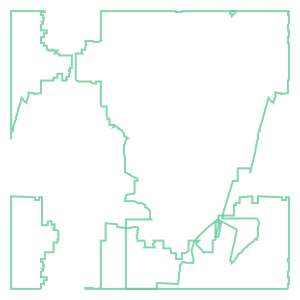

In [24]:
shapely.MultiLineString(region)

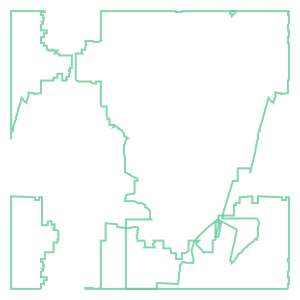

In [33]:
shapely.MultiLineString(list(gdf['geometry']))

In [37]:
import folium
map_bounds = {"north":34.009942,"south":33.977964,"east":-118.441879,"west":-118.485593}
m = folium.Map(max_bounds=True, zoom_start=10, tiles="CartoDB positron", 
               location=[(map_bounds["north"]+map_bounds["south"])/2,(map_bounds["west"]+map_bounds["east"])/2],
               min_lat=map_bounds["north"],
               max_lat=map_bounds["south"],
               min_lon=map_bounds["west"],
               max_lon=map_bounds["east"])
m


In [82]:
import geopandas as gpd

ca_geos = gpd.read_file('data/City_and_County_Boundary_Line_Changes_5717226126690060041.geojson')
ca_geos.head()

,OBJECTID,COUNTY,CITY,COPRI,created_user,created_date,last_edited_user,last_edited_date,geometry
0,1,Trinity County,Unincorporated,53000,None,None,None,None,"POLYGON ((-13634838.383 5060183.558, -13634795..."
1,2,Yuba County,Unincorporated,58000,None,None,APRICE1,"Thu, 27 Jun 2024 20:52:39 GMT","POLYGON ((-13536521.034 4736011.421, -13536638..."
2,3,Alpine County,Unincorporated,02000,None,None,None,None,"POLYGON ((-13347698.539 4712138.523, -13344536..."
3,4,Mariposa County,Unincorporated,22000,None,None,None,None,"POLYGON ((-13302710.896 4560586.643, -13302695..."
4,5,Alameda County,Albany,01022,None,None,None,None,"POLYGON ((-13612893.59 4565119.21, -13612893.9..."


In [83]:
cities = pd.read_csv('data/Missing CRMLS Cities - Requested Cities (1).csv')
cities

,City,In Zillow
0,Adelanto,yes
1,Aerial Acres,no
2,Afton,no
3,Agoura Hills,yes
4,Agua Fria,no
...,...,...
614,Yorkville,yes
615,Yosemite,yes
616,Yucca Valley,yes
617,Yuma,no


In [88]:
cities_found = cities[cities['City'].isin(ca_geos['CITY'])]
#cities_found[cities_found['In Zillow'] == 'no']
cities_found.to_csv('data/cities_found.csv')
cities_found

,City,In Zillow
0,Adelanto,yes
3,Agoura Hills,yes
13,Anaheim,yes
14,Anderson,yes
21,Apple Valley,yes
...,...,...
587,Walnut,yes
592,West Hollywood,yes
596,Westlake Village,yes
608,Windsor,no


In [87]:
cities[(~cities['City'].isin(ca_geos['CITY'])) & (cities['In Zillow'] == 'yes')].to_csv('data/missing_cities.csv')

In [86]:
cities_found = ca_geos['CITY'].unique()
count = 0
for c in cities[~cities['City'].isin(ca_geos['CITY'])]['City']:
    for ca_city in cities_found:
        if c in ca_city:
            count += 1
            print(f'City Requested: {c}, City Found: {ca_city}')
print(count)

City Requested: Hollywood, City Found: West Hollywood
City Requested: Oaks, City Found: Del Rey Oaks
City Requested: Oaks, City Found: Thousand Oaks
City Requested: Palms, City Found: Twentynine Palms
City Requested: Pico, City Found: Pico Rivera
City Requested: San Juan, City Found: San Juan Capistrano
City Requested: San Juan, City Found: San Juan Bautista
7
